##  Prueba Determinantes de Ingreso - Hito 4
#### Camila Vera Villa - agosto 12, 2019
#### Objetivo
Completar el punto de Modelación predictiva..
#### Elementos a considerar
* La preparación del ambiente de trabajo (imports, separación de muestras) para
implementar modelos de predicción. (1 punto)
* La implementación de por lo menos tres modelos predictivos. (2 puntos)
* El reporte del mejor modelo predictivo en base a los resultados. (2 puntos)
#### Entregable
* Dos notebooks (uno por enunciado) con todos los puntos detallados e interpretados. De ser necesario, un archivo con extensión .py con todas las funciones implementadas.


### I. Preliminares
Descripción del problema y objetivos, así como explicar cómo implementarán su solución (debe considerar qué criterios de optimización y métricas de desempeño).

* **Descripción del problema**

Se generara un modelo de clasficacion que prediga la probabilidad de que un individuo obtenga ingresos mayores o menores a 50.000 dolares anuales, basado en ciertas variables sociodemograficas.

* **Objetivos**

Se desarrollara un modelo basado en regresion logistica (de clasificacion), el cual permita clasificar en clases binarias los ingresos: superiores o inferiores a 50.000 USD.

* **Metodologia y criterios de optimizacion**

    La metodologia consiste a grandes rasgos en la ingesta de datos, preprocesamiento, visualización y modelación. Lo que corresponde a lo siguiente:    
    
    - Importacion y limpieza dataset
    - Visualizacion de valores perdidos
    - Recodificacion de variables, generacion de dummies 
    - Visualizacion de frecuencias con histogramas: variables continuas
    - Visualizacion de frecuencias con graficos de barras: variables categoricas
    - Generacion diagramas de dispersion (scatter plot)
    - Generacion de pruebas de normalidad y mapas de correlacion
    - Generacion de modelos econometricos con las variables predictoras
    - Depuracion de modelos con las variables estadisticamente significativas. (p valor < 0.05)
    - Generacion de nuevo modelo de Machine Learning de Clasificacion
    
    
* **Metricas y evaluacion de desempeno**

    Para la evaluacion de los resultados y determinar cual es el mejor modelo se realizara lo siguiente:

     - Analisis de los  modelos  y sus predicciones.
     - Evaluacion de la matriz de confusion, precision, recall, f1, accuracy, curvas y ROC.
     
* **Librerias a utilizar**
    - Para visualzacion de datos, **numpy** y **pandas**
    - Para exploracion y analisis estadistico, **scipy.stats** y **statsmodels**
    - Para graficar, **matplotlib.pyplot** y **seaborn**
    - Para algoritmos de regresion y clasificacion, **sklearn**

### II. Aspectos computacionales
Librerías y módulos a implementar, funciones generadas y su objetivo.

IMPORTACION DE LIBRERIAS

In [2]:
# librerias clasicas para describir
import numpy as np
import pandas as pd
import pandas_profiling


#libreria statmodels para exploracion y analisis estadistico
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

#libreria sklearn, para algoritmos de regresion y clasificacion
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

from copy import copy
import missingno as msngo

# funciones propias

# librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette = "pastel")

plt.style.use('seaborn') 
#plt.rcParams["figure.figsize"] = (20, 20) # Tamaño 
#plt.rcParams["figure.dpi"] = 100 # resolución

* **Importacion y limpieza dataset**

In [3]:
#carga dataset
df= pd.read_csv("income-db.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


La base de datos contiene los valores perdidos como **'?'**. Para reemplazar estos valores, se creara una lista previa con los valores perdidos, y se incorporara al cargar el dataset como **na_values = missing_values**

In [5]:
# transformacion de valores perdidos'?'
missing_values=["?"] 
df= pd.read_csv("income-db.csv", na_values = missing_values)
df.shape

(48842, 15)

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Inspección de datos perdidos en las variables

 * **Visualizacion y recodificacion de valores perdidos**

In [8]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
df2 = df.dropna()
df2.shape

(45222, 15)

In [10]:
print ("Cantidad de valores iniciales:  ", df.shape[0])
print ("Cantidad de valores luego de aplicar drop:  ", df2.shape[0])
print ("Cantidad de valores eliminados son:  ", df.shape[0]-df2.shape[0])
print ("Porcentaje de valores eliminados son:  ", round(((df.shape[0]-df2.shape[0])/df.shape[0])*100,3), "%" )

Cantidad de valores iniciales:   48842
Cantidad de valores luego de aplicar drop:   45222
Cantidad de valores eliminados son:   3620
Porcentaje de valores eliminados son:   7.412 %


Los datos perdidos corresponden al 7.4% del dataset, por lo que al eliminarlos no se altera demasiado la distribucion de la muestra. Considerando la extension de esta, cercana a los 49.000 datos.

In [11]:
# reemplazo del df
df = df2
df.shape

(45222, 15)

### Recodificacion de las siguientes variables acorde a las nomenclaturas indicadas:
    - occupation
    - workclass
    - education
    - marital-status
    - native-country
    - income

In [12]:
#Listas para funcion

#occupation debe recodificarse como collars siguiendo una nomenclatura similar a:
whitecollar_list = ['Prof-specialty', 'Exec-managerial','Adm-clerical','Sales','Tech-support']
bluecollar_list= ['Craft-repair',  'Machine-op-inspct','Transport-moving','Handlers-cleaners', 
'Farming-fishing', 'Protective-serv','Priv-house-serv']
others_list= ['Other-service', 'Armed-Forces']

#workclass debe recodificarse como workclass_recod siguiendo una nomenclatura similar a :
federal_gov_list=['Federal-gov']
state_level_gov_list=['State-gov', 'Local-gov']
self_employed_list=['Self-emp-inc', 'Self-emp-not-inc']
unemployed_list=['Never-worked', 'Without-pay']

#education debe recodificarse como educ_recod siguiendo una nomenclatura similar a:
preschool_list=['Preschool']
elementary_school_list=['1st-4th','5th-6th']
high_school_list=['7th-8th', '9th', '10th','11th', '12th', 'HS-grad']
college_list=['Assoc-voc', 'Assoc-acdm', 'Some-college']
university_list=['Bachelors', 'Masters', 'Prof-school', 'Doctorate']

#marital-status debe recodificarse como civstatus siguiendo una nomenclatura similar a:
married_list=['Married-civ-spouse', 'Married-spouse-absent', 'Married-AFspouse']
divorced_list=['Divorced']
separated_list=['Separated']
widowed_list=['Widowed']

#native-country debe recodificarse como region donde cada país debe asignarse a uno de los 5 continentes.
america_list=['United-States','Peru','Guatemala','Mexico','Dominican-Republic',
              'Haiti','El-Salvador','Puerto-Rico','Cuba','Canada','Nicaragua','Jamaica','Ecuador',
              'Trinadad&Tobago','Outlying-US(Guam-USVI-etc)','Honduras'] 
europe_list=['England','Poland','Ireland','Germany','Italy','Portugal','Scotland','Yugoslavia',
             'Hungary','Greece','France','Holand-Netherlands']
asia_list=['Philippines','Thailand','Vietnam','Japan','India','Cambodia','Laos','Taiwan','Iran','China','asia','Hong']

In [13]:
#Funcion para recodificar variables
def create_dic(df, to_replace, prof_list):
    '''Def: Función que  crea un diccionario para recodificar listas de categorias
    Input: df,lista a recodificar, y categorias
    Output: categoria recodificada.'''
    
    array_to_replace = ([to_replace] * len(prof_list))
    return dict(zip(prof_list, array_to_replace))

In [14]:
#DICCIONARIOS
#occupation debe recodificarse como collars
white_collar_dict=create_dic(df, 'white-collar',whitecollar_list)
blue_collar_dict=create_dic(df, 'blue-collar',bluecollar_list)
others_list_dict=create_dic(df, 'others',others_list)

#workclass debe recodificarse como workclass_recod
federal_gov_dict=create_dic(df,'federal-gov', federal_gov_list)
state_level_gov_dict=create_dic(df,'state-level-gov',state_level_gov_list)
self_employed_dict=create_dic(df,'self-employed',self_employed_list)
unemployed_dict=create_dic(df,'unemployed',unemployed_list)

#education debe recodificarse como educ_recod
preschool_dict=create_dic(df,'preschool',preschool_list)
elementary_school_dict=create_dic(df,'elementary-school',elementary_school_list)
high_school_dict=create_dic(df,'high-school',high_school_list)
college_dict=create_dic(df,'college',college_list)
university_dict=create_dic(df,'university',university_list)

#marital-status debe recodificarse como civstatus
married_dict=create_dic(df,'married',married_list)
divorced_dict=create_dic(df,'divorced',divorced_list)
separated_dict=create_dic(df,'separated',separated_list)
widowed_dict=create_dic(df,'widowed',widowed_list)

#native-country debe recodificarse como region
america_list=create_dic(df,'america',america_list)
europe_list=create_dic(df,'europe',europe_list)
asia_list=create_dic(df,'asia',asia_list)

#reemplazar todos los diccionarios
to_replace_dict = dict(**white_collar_dict, **blue_collar_dict, **others_list_dict,**federal_gov_dict,
                       **state_level_gov_dict,**self_employed_dict,**unemployed_dict,
                      **preschool_dict,**elementary_school_dict,**high_school_dict,**college_dict,**university_dict,
                      **married_dict,**divorced_dict,**separated_dict,**widowed_dict,
                      **america_list,**europe_list,**asia_list)

* **income debe recodificarse de forma binaria**

In [15]:
#binarización de 'income'
df['income'].value_counts('%')

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

In [16]:
#binarizacion con MAP
df['income']=df.income.map({'<=50K':0,'>50K':1})

In [17]:
df['income'].value_counts('%')

0    0.752156
1    0.247844
Name: income, dtype: float64

In [18]:
df.replace(to_replace_dict, inplace=True)

In [19]:
df.head(30)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,america,0
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,america,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,america,1
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,america,1
5,34,Private,198693,high-school,6,Never-married,others,Not-in-family,White,Male,0,0,30,america,0
7,63,self-employed,104626,university,15,married,white-collar,Husband,White,Male,3103,0,32,america,1
8,24,Private,369667,college,10,Never-married,others,Unmarried,White,Female,0,0,40,america,0
9,55,Private,104996,high-school,4,married,blue-collar,Husband,White,Male,0,0,10,america,0
10,65,Private,184454,high-school,9,married,blue-collar,Husband,White,Male,6418,0,40,america,1
11,36,federal-gov,212465,university,13,married,white-collar,Husband,White,Male,0,0,40,america,0


In [20]:
#  renombramiento de columnas
df.rename(columns=lambda x: x.replace('occupation', 'collars'), inplace=True) 
df.rename(columns=lambda x: x.replace('workclass', 'workclass_recod'), inplace=True) 
df.rename(columns=lambda x: x.replace('education', 'educ_recod'), inplace=True) 
df.rename(columns=lambda x: x.replace('native-country', 'region'), inplace=True)
df.rename(columns=lambda x: x.replace('marital-status', 'civstatus'), inplace=True)

In [21]:
df['collars'].value_counts('%')

white-collar    0.538676
blue-collar     0.354695
others          0.106630
Name: collars, dtype: float64

In [22]:
df['workclass_recod'].value_counts('%')

Private            0.736522
self-employed      0.120340
state-level-gov    0.111583
federal-gov        0.031091
unemployed         0.000464
Name: workclass_recod, dtype: float64

In [23]:
df['educ_recod'].value_counts('%')

high-school          0.435651
college              0.295542
university           0.252377
elementary-school    0.014838
preschool            0.001592
Name: educ_recod, dtype: float64

In [24]:
df['civstatus'].value_counts('%')

married              0.477798
Never-married        0.322807
divorced             0.139246
separated            0.031202
widowed              0.028238
Married-AF-spouse    0.000708
Name: civstatus, dtype: float64

In [25]:
df['region'].value_counts('%')

america     0.959069
asia        0.020565
europe      0.016319
South       0.002233
Columbia    0.001813
Name: region, dtype: float64

* **quitar south y columbia del df**

Se quitan estos datos ya que no estan bien definidos como paises. No tendra mayor implicancia en los resultados, ya que corresponden a valores bajos de frecuencia.

In [26]:
south_index = df[df['region']== 'South'].index
columbia_index = df[df['region']=='Columbia'].index

In [27]:
df.drop(south_index, axis = 0, inplace = True)
df.drop(columbia_index, axis = 0, inplace = True)

In [28]:
df.head(5)

,age,workclass_recod,fnlwgt,educ_recod,educ_recodal-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,america,0
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,america,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,america,1
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,america,1
5,34,Private,198693,high-school,6,Never-married,others,Not-in-family,White,Male,0,0,30,america,0



### III. Descripción
Análisis descriptivo considerando el tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento (datos perdidos, recodificaciones).

### Inspeccion visual del vector objetivo

In [29]:
#para obtener el tipo de variables (int son del tipo numerico y object corresponde a string)
df.dtypes 

age                  int64
workclass_recod     object
fnlwgt               int64
educ_recod          object
educ_recodal-num     int64
civstatus           object
collars             object
relationship        object
race                object
gender              object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
region              object
income               int64
dtype: object

#### Estadisticas descriptivas de las variables con pandas_profiling

In [30]:

pandas_profiling.ProfileReport(df, correlation_threshold = 1)

Number of variables,16
Number of observations,45039
Total Missing (%),0.0%
Total size in memory,5.5 MiB
Average record size in memory,128.0 B
Numeric,7
Categorical,8
Boolean,1
Date,0
Text (Unique),0
Rejected,0


Luego de la recodificación y limpieza del dataset se genera un reporte de las estadísticas descriptivas con **pandas_profiling**, de esto se rescata lo siguiente:

- No se observan datos perdidos
- Se señalan 2 warnings con las variables **capital-gain y capital-loss**, las que presentan una muy alta frecuencia en los valores 0 (sobre un 90% de zeros), lo cual corresponden a valores muy extremos de esta variables, sin embargo se consideraran para el análisis.
- respecto a **age**, se observa que el rango de edades de la muestra oscila entre los 17 y 90 años, con una media de 38 años, estando la mayor concentración de la muestra entre los 20 y 45 años aproximadamente.
- respecto a **civstatus**, se observa que el estado civil predominante de los individuos es married con un 47.8% de la muestra, seguidos por  Never-married, con un 32,3% y divorced con 13,3%. Las categorías “separated”, “widowed owed” y “Married-AF-spouse¨, corresponden en conjunto, a la minoria con un 6% de la muestra.
- respecto a **collars**, se distingue una mayor ocupación de los individuos en la categoría  “white-collar”, con un 53.9%, seguida por “blue-collar” con el 35.5%.
- respecto a **educ_recod**,se observa que la mayoría de la muestra llega a un nivel educacional de secundaria, con “high-school” en un 43,6%
- respecto a **gender**, se observa que la mayoría de la muestra corresponde a hombres con una frecuencia de “male” del 67.5% . La frecuencia de “female” es de un 32.5%
- respecto a **race**, se observa una muestra muy sesgada, siendo de raza blanca “white” el 86% de la muestra y muy por debajo “black” con un 9.3% de frecuencia.
- respecto a **región**, se observa al igual que con gender, valores muy extremos, siendo “america”  la categoría predominante con un 95.9% de frecuencia, seguido por Asia con un 2,1%
- respecto a **workclass_recod**, se observa que la mayoría de los empleados trabaja en una organizacion privada, siendo la frecuencia de “private” de un 73.7%, seguido por “self-employed


In [31]:
# ciclo para obtener las estadísticas descriptivas

for i in df:
    if len(df[i].value_counts()) > 2:
         print(df[i].describe(), "\n")
    else:
        print(df[i].value_counts('%'), "\n") 

count    45039.000000
mean        38.546615
std         13.218089
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64 

count       45039
unique          5
top       Private
freq        33181
Name: workclass_recod, dtype: object 

count    4.503900e+04
mean     1.897403e+05
std      1.056357e+05
min      1.349200e+04
25%      1.173630e+05
50%      1.783410e+05
75%      2.379430e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64 

count           45039
unique              5
top       high-school
freq            19617
Name: educ_recod, dtype: object 

count    45039.000000
mean        10.117964
std          2.552170
min          1.000000
25%          9.000000
50%         10.000000
75%         13.000000
max         16.000000
Name: educ_recodal-num, dtype: float64 

count       45039
unique          6
top       married
freq        21515
Name: civstatus, dtype: object 

count            45039
unique     

La estadistica anterior presenta un resumen de las estadisticas descriptivas de las variables.
- Para las variables objetivo Income, se puede observar que un 75% de las muestras corresponden al caso de individuos que percibe un ingreso menor a 50.000usd.
- La dispersion de los datos pueden observarse en la diferencia de las medias y desviaciones estandar.


### Inspeccion visual del vector objetivo

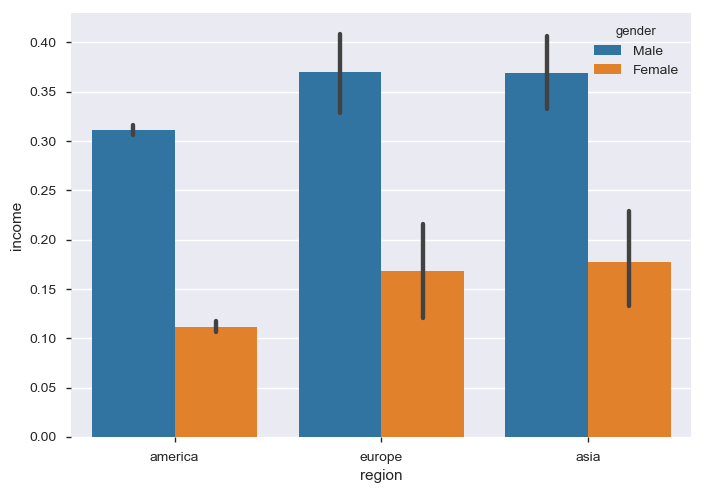

In [32]:
sns.barplot(x="region", y="income", data=df, hue='gender')
sns.set(style="ticks", palette ="pastel")

En este gráfico se ve que hay una importante proporción de hombres, casi el doble que las mujeres, en cuanto a percibir ingresos superiores a 50k, la distribución es relativamente similar a nivel de continentes, donde las mayores brechas se observan en América y Africa, aparantemente

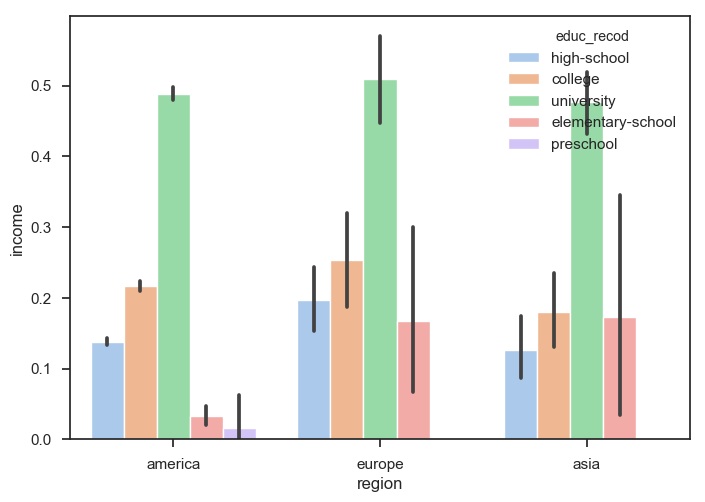

In [33]:
sns.barplot(x="region", y="income", data=df, hue='educ_recod')
sns.set(style="ticks", palette ="pastel")

En este gráfico se observa que los individuos que asitieron a la Universidad son aquellas que tienen mayores ingresos sobre 50k.

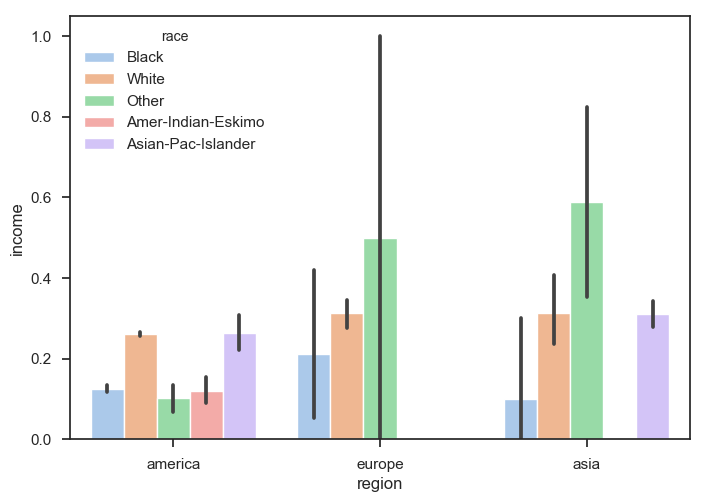

In [34]:
sns.barplot(x="region", y="income", data=df, hue='race')
sns.set(style="ticks", palette ="pastel")

En este gráfico se ve la influencia de las razas para el ingreso superior a 50 k. Se observa que hay diferencias intercontinentales marcadas, por ejemplo, en América los 'blancos' son mayoria, en Europa y Asia, la raza 'otros' predomina sobre los blancos.

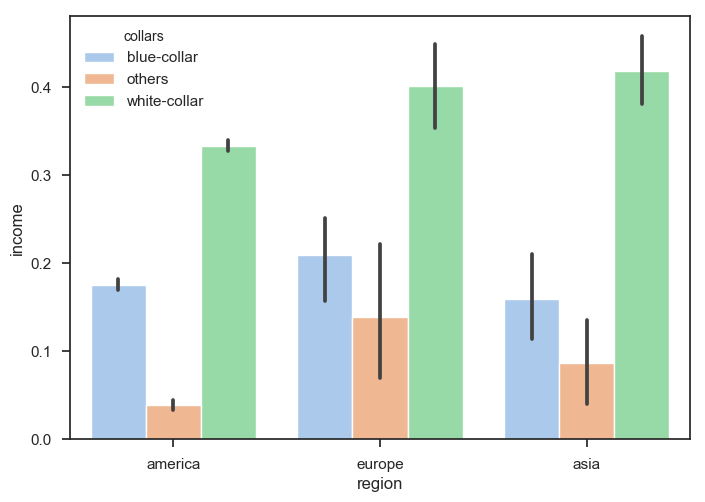

In [35]:
sns.barplot(x="region", y="income", data=df, hue='collars')
sns.set(style="ticks", palette ="pastel")

En este grafico, se observa que las ocupaciones de cuello blanco (trabajador realiza tareas semi-profesionales o profesionales de oficina y administración) corresponde a altamente a la mayoria de las frecuencias y son adem'as quienes reciben mayores ingresos en los 3 continentes estudiados.

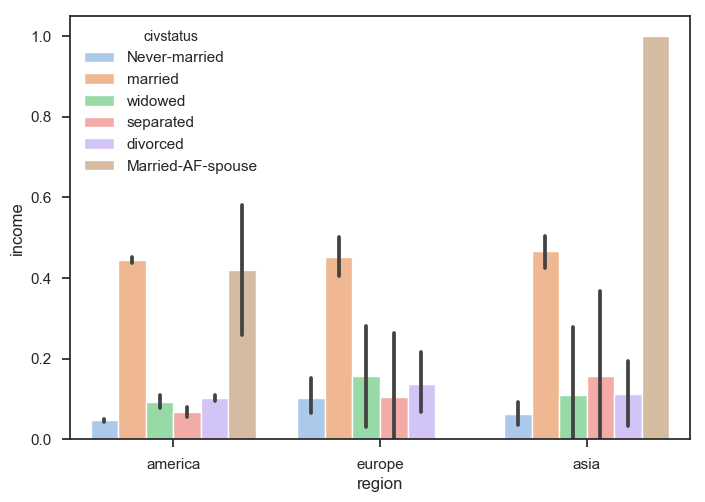

In [36]:
sns.barplot(x="region", y="income", data=df, hue='civstatus')
sns.set(style="ticks", palette ="pastel")

Las mayores probabilidades de ingresos sobre 50 k se encuentran a los individuoscasados, independiente del continente.

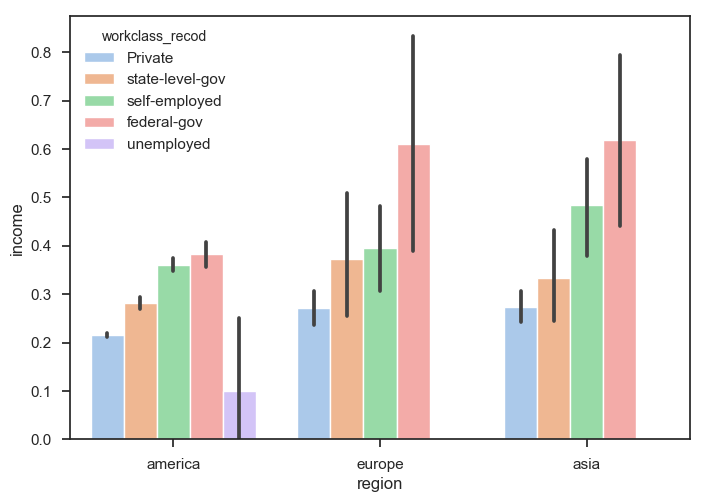

In [37]:
sns.barplot(x="region", y="income", data=df, hue='workclass_recod')
sns.set(style="ticks", palette ="pastel")

Se puede apreciar que los empleados del gobierno federal son los que tienden a ganar mayores ingresos, es decir sobre 50k, en todos los continentes, la proporción entre éstos y los demas tipos de trabajos varía continente a continente.

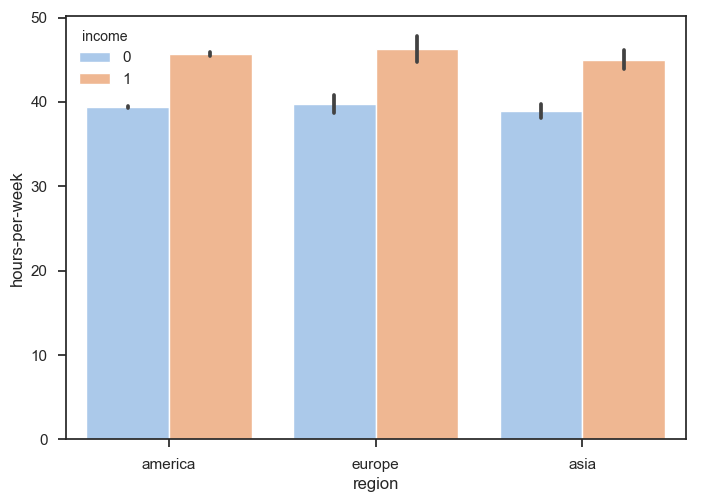

In [38]:
sns.barplot(x="region", y= "hours-per-week", data=df, hue='income')
sns.set(style="ticks", palette ="pastel")

Se observa que quienes reciben ingresos superiores a 50 k, trabajan, en promedio una mayor cantidad de horas, que aquellos que perciben ingresos inferiores a 50, sin embargo, no es una diferencia tan significativa entre quienes trabajan mayor cantidad de horas.

### ScatterPlot

In [39]:
#reemplazar "-" a los columnas que lo contengan, por "_"
for col_name, col_data in df.iteritems():
    if col_data.dtype == 'object':
        df[col_name] = df[col_name].str.replace('-','_')  # Esto reemplaza los '-' en los registros
    # Esto reemplaza los '-' en los nombres de las columnas
    df.rename(columns = {col_name:col_name.replace('-','_')}, inplace = True) 

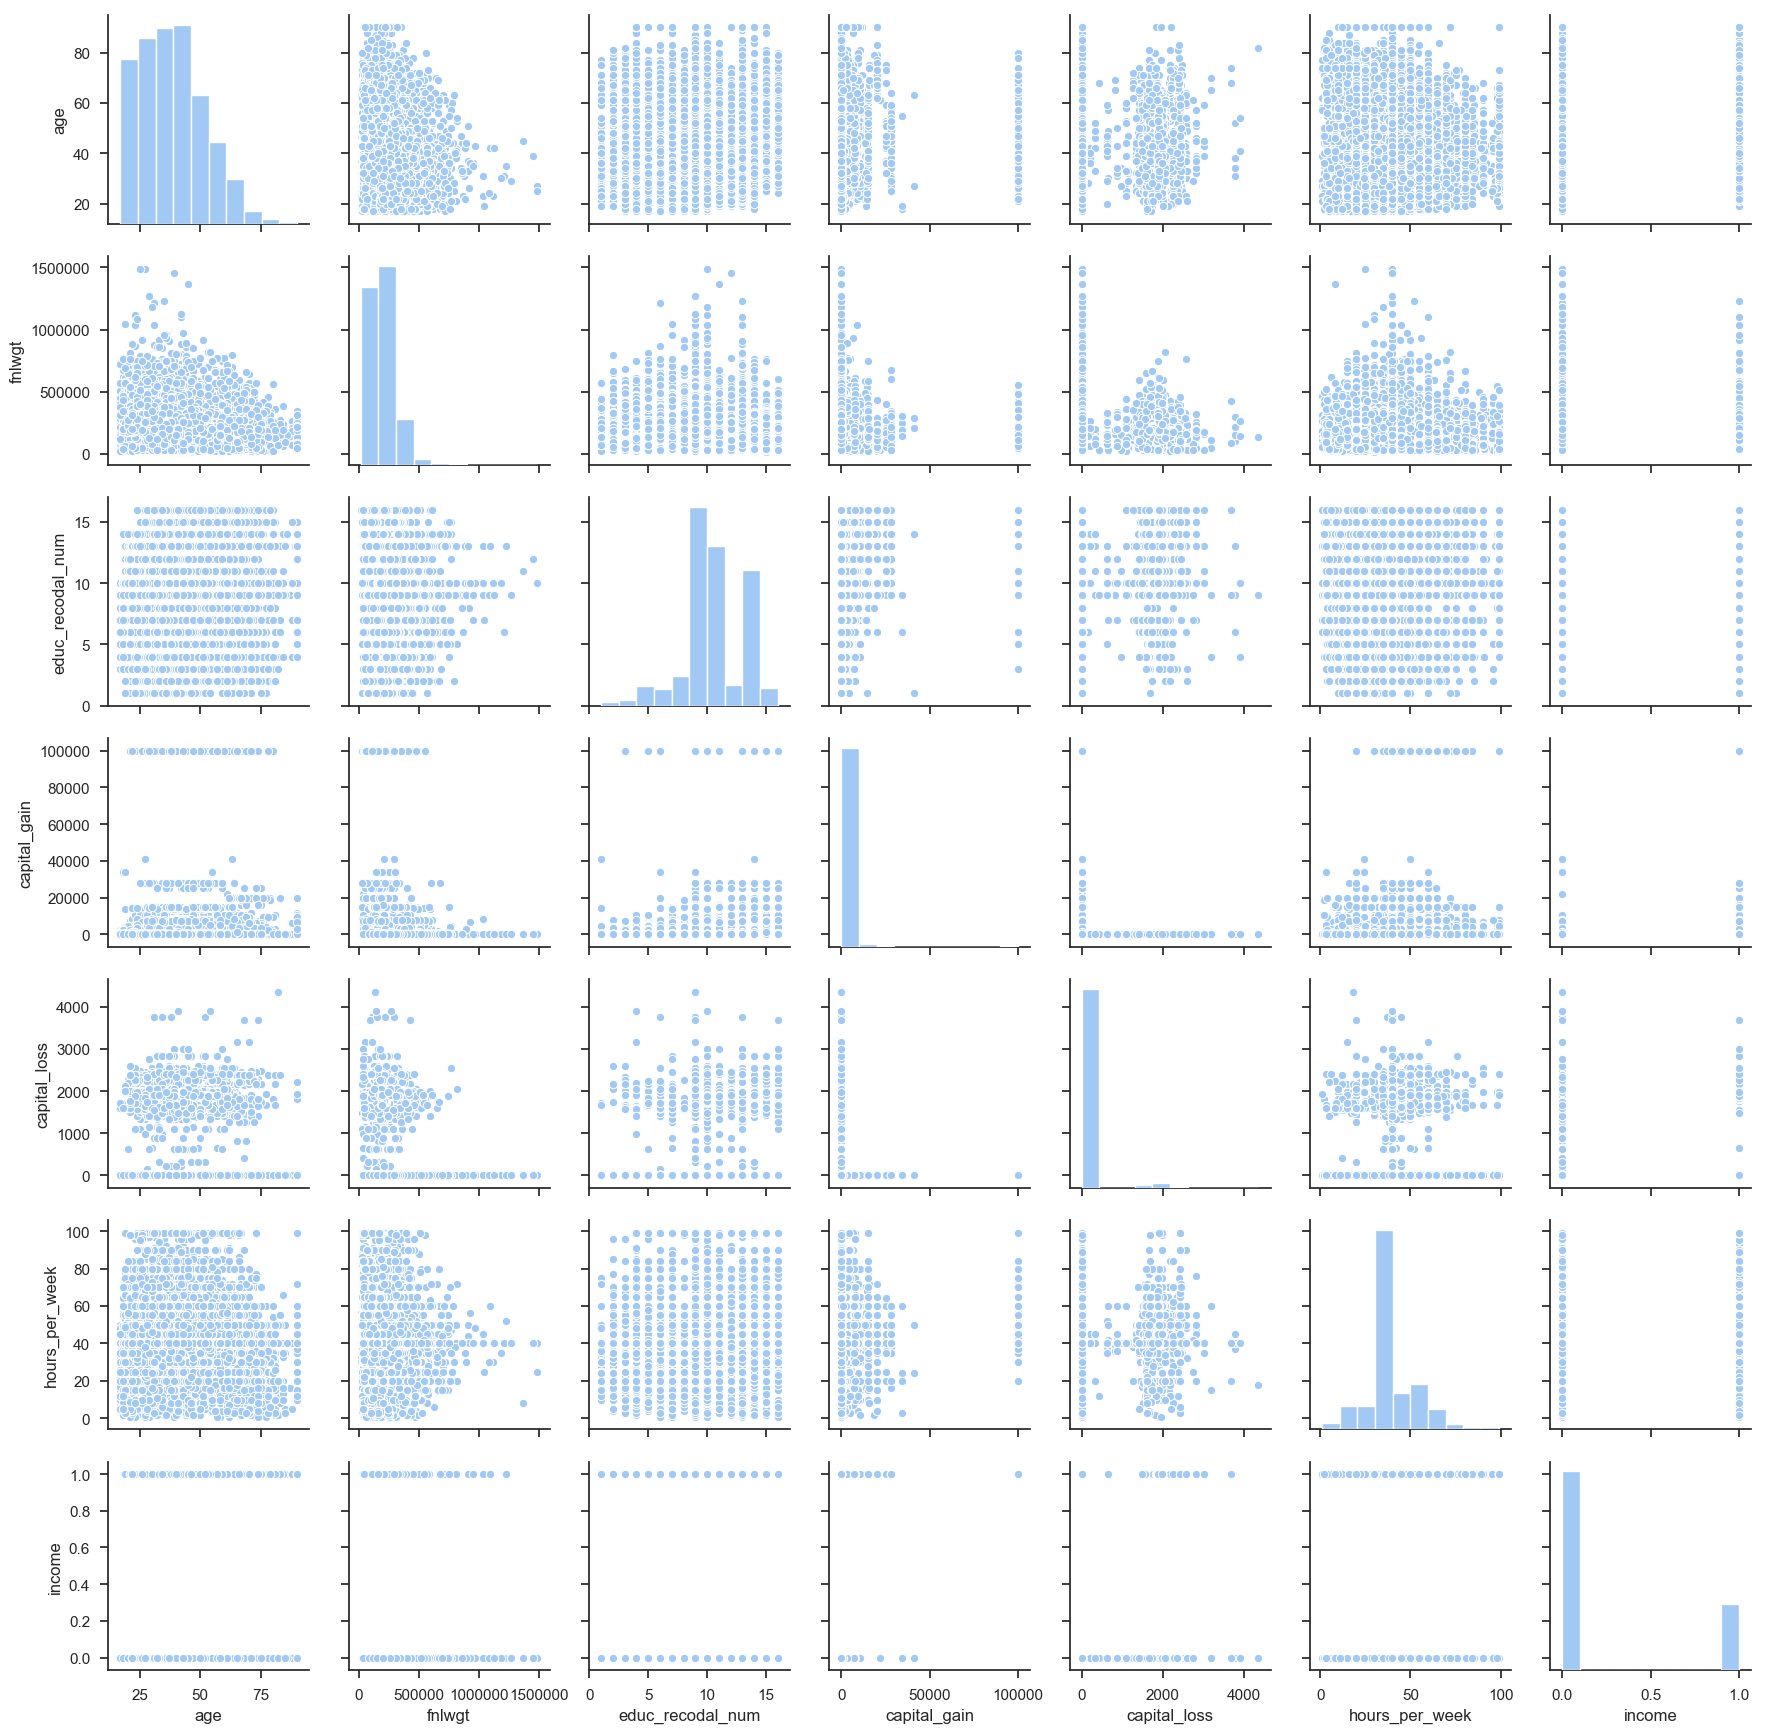

In [40]:
sns.pairplot(df)
sns.set(style="ticks", palette ="pastel")

El ScatterPlot muestra las distribuciones de las variables numéricas y categóricas, confrontandolas de manera pareada, sirve para visualizar a nivel general las variables.

### Correlaciones \ Heatmap

In [1]:
df.corr().style.background_gradient(cmap = 'Greens') 

NameError: name 'df' is not defined

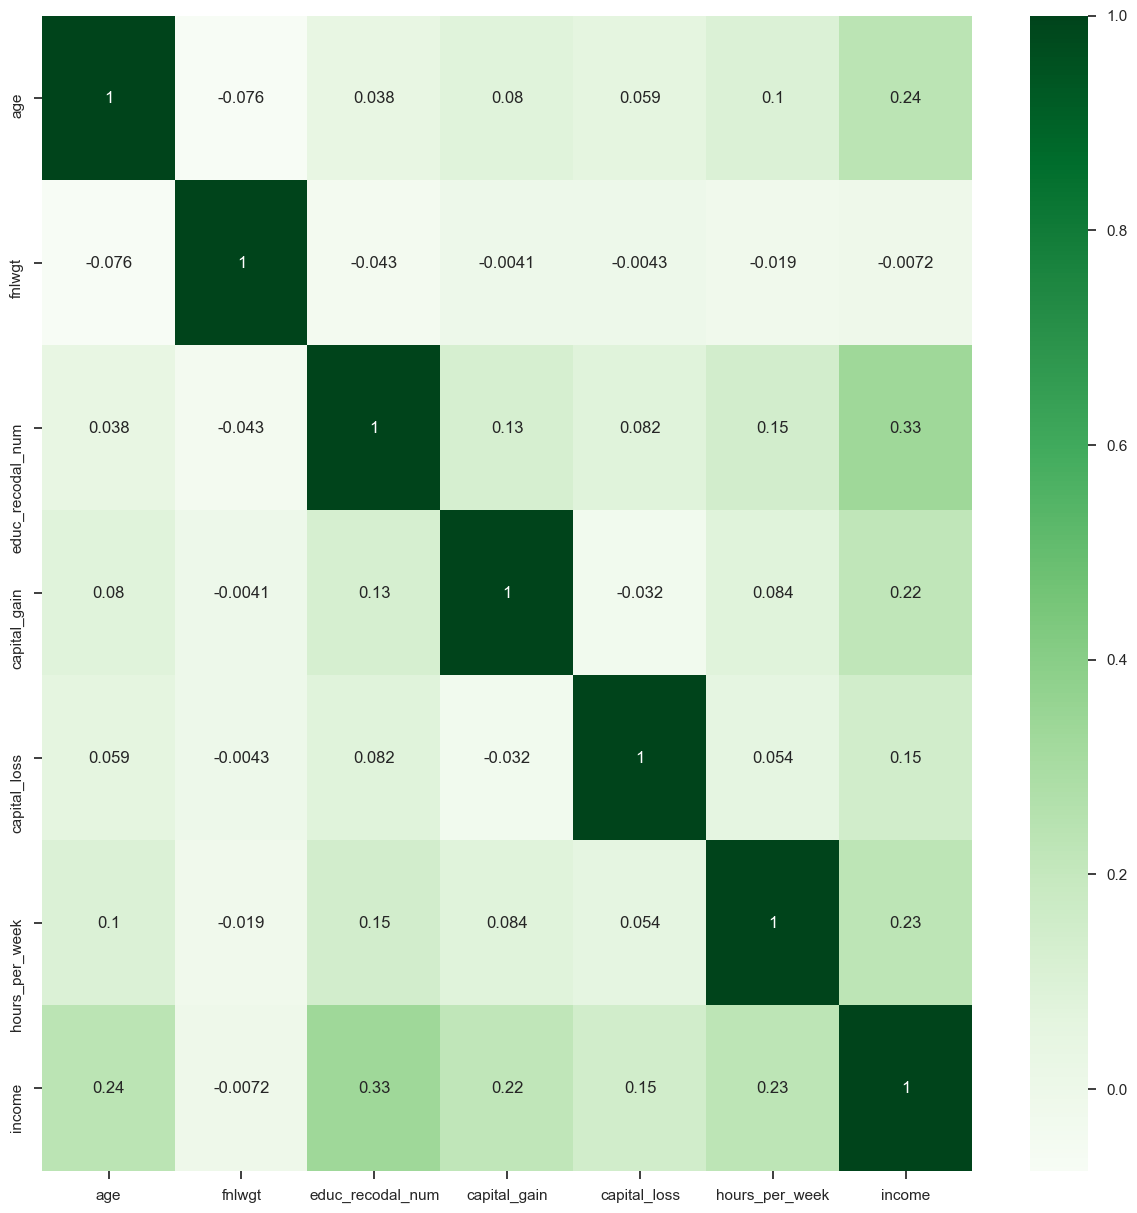

In [42]:
plt.figure(figsize=(15,15)) # aumentamos el tamaño
sns.heatmap(df.corr(), cmap='Greens',annot=True) # mapa de calor de las correlaciones

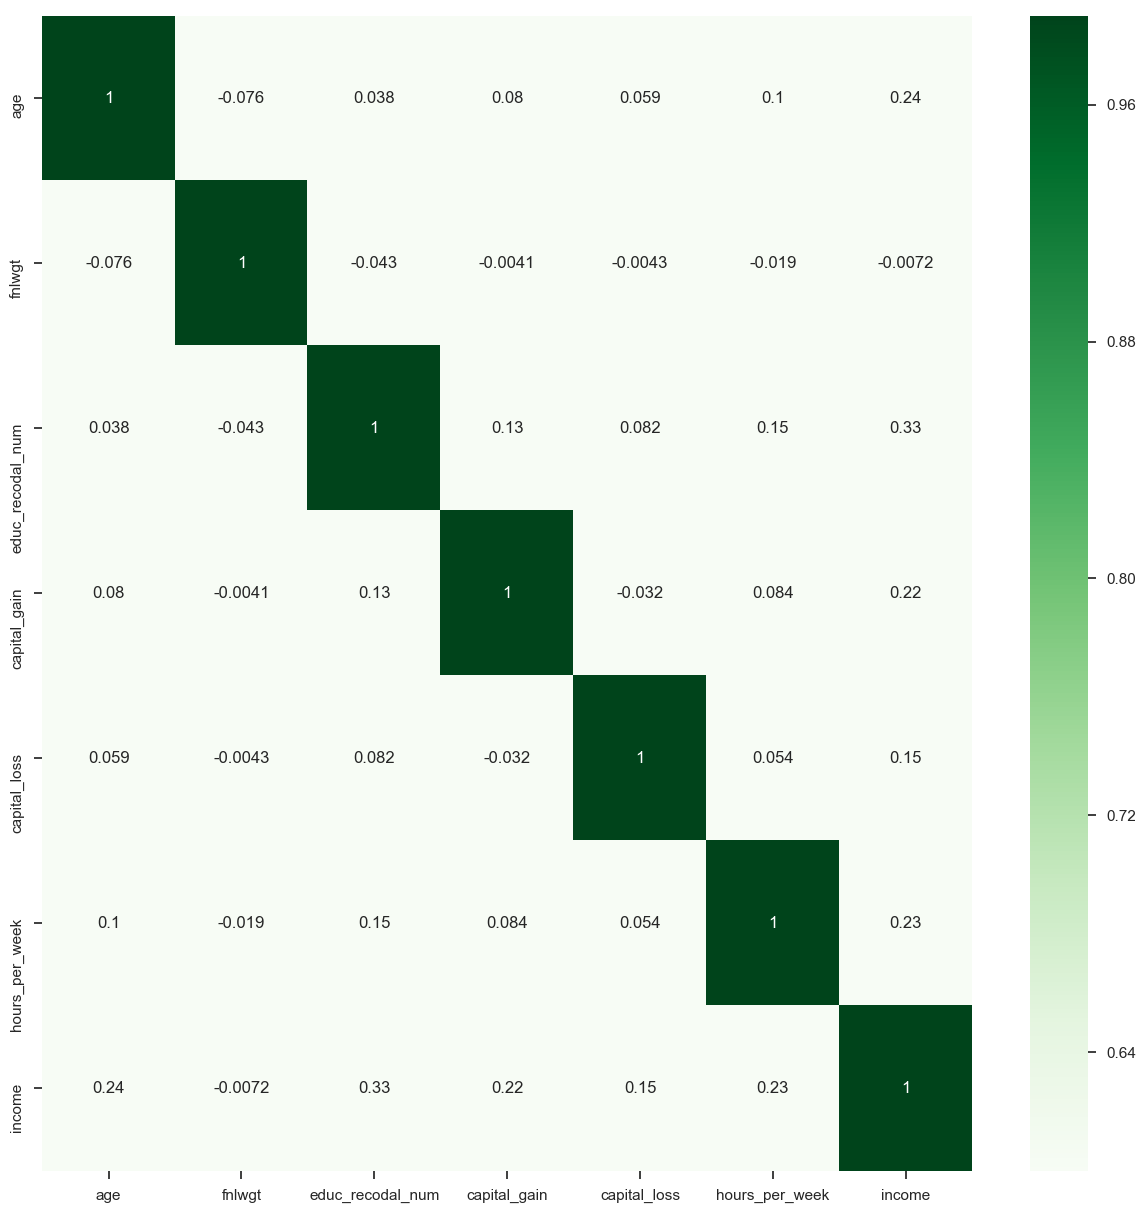

In [43]:
# aumento de tamaño
plt.figure(figsize=(15,15)) 
# mapa de calor de las correlaciones mayores a 0.6 (vmin=0.6)
sns.heatmap(df.corr(), cmap='Greens',vmin=0.6, vmax=0.99, annot=True) 

In [44]:
def corr_means(dataframe, significative=0.5):
    """
    Def: Función que extrae las correlaciones significativas a un nivel asignado
    
    Input: dataframe a correlacionar, significative (float) de 0 hasta 1.0 que indica el nivel de significancia a filtrar, por 
    defecto viene asignado con un valor superior o igual a 0.5 
    
    Outpout:Imprime las correlaciones positivas y negativas significativas
    """

    names=dataframe.corr().columns.tolist()

    for element in names:
        corr=dataframe.corr()[element].sort_values(ascending=False)
        means_values_positives= pd.Series(corr).where(lambda x  : x>=significative).dropna() 
        means_values_negatives= pd.Series(corr).where(lambda x  : x<=-significative).dropna()


        print("Correlaciones significativas positivas: ",means_values_positives,"\n","\n","Correlaciones significativas negativas: ","\n",means_values_negatives,"\n" )
        

In [45]:
corr_means(df)

Correlaciones significativas positivas:  age    1.0
Name: age, dtype: float64 
 
 Correlaciones significativas negativas:  
 Series([], Name: age, dtype: float64) 

Correlaciones significativas positivas:  fnlwgt    1.0
Name: fnlwgt, dtype: float64 
 
 Correlaciones significativas negativas:  
 Series([], Name: fnlwgt, dtype: float64) 

Correlaciones significativas positivas:  educ_recodal_num    1.0
Name: educ_recodal_num, dtype: float64 
 
 Correlaciones significativas negativas:  
 Series([], Name: educ_recodal_num, dtype: float64) 

Correlaciones significativas positivas:  capital_gain    1.0
Name: capital_gain, dtype: float64 
 
 Correlaciones significativas negativas:  
 Series([], Name: capital_gain, dtype: float64) 

Correlaciones significativas positivas:  capital_loss    1.0
Name: capital_loss, dtype: float64 
 
 Correlaciones significativas negativas:  
 Series([], Name: capital_loss, dtype: float64) 

Correlaciones significativas positivas:  hours_per_week    1.0
Name: hour

No se observan correlaciones de Pearson lo suficientemente explicativas (r>0.5) entre las variables continuas.

                                  ***

### HITO 3 - MODELACION DESCRIPTIVA

In [46]:
# Generacionde variables dummies

In [47]:
df_dummies = pd.get_dummies(df, drop_first = True)

In [48]:
df_dummies.head()

,age,fnlwgt,educ_recodal_num,capital_gain,capital_loss,hours_per_week,income,workclass_recod_federal_gov,workclass_recod_self_employed,workclass_recod_state_level_gov,...,relationship_Own_child,relationship_Unmarried,relationship_Wife,race_Asian_Pac_Islander,race_Black,race_Other,race_White,gender_Male,region_asia,region_europe
0,25,226802,7,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,44,160323,10,7688,0,40,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [49]:
df_dummies.columns

Index(['age', 'fnlwgt', 'educ_recodal_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'workclass_recod_federal_gov',
       'workclass_recod_self_employed', 'workclass_recod_state_level_gov',
       'workclass_recod_unemployed', 'educ_recod_elementary_school',
       'educ_recod_high_school', 'educ_recod_preschool',
       'educ_recod_university', 'civstatus_Never_married',
       'civstatus_divorced', 'civstatus_married', 'civstatus_separated',
       'civstatus_widowed', 'collars_others', 'collars_white_collar',
       'relationship_Not_in_family', 'relationship_Other_relative',
       'relationship_Own_child', 'relationship_Unmarried', 'relationship_Wife',
       'race_Asian_Pac_Islander', 'race_Black', 'race_Other', 'race_White',
       'gender_Male', 'region_asia', 'region_europe'],
      dtype='object')

In [50]:
# reemplazo del df
df=df_dummies

### Modelación inicial (Modelo saturado)

Se realizara una regresion logistica aplicada sobre el vector objetivo binario **income** utilizando todas las variables (df.columns para obtener todas los nombres disponibles de las variables a usar)

In [51]:
variables= list(df.columns)
variables.remove('income')
variables

['age',
 'fnlwgt',
 'educ_recodal_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_recod_federal_gov',
 'workclass_recod_self_employed',
 'workclass_recod_state_level_gov',
 'workclass_recod_unemployed',
 'educ_recod_elementary_school',
 'educ_recod_high_school',
 'educ_recod_preschool',
 'educ_recod_university',
 'civstatus_Never_married',
 'civstatus_divorced',
 'civstatus_married',
 'civstatus_separated',
 'civstatus_widowed',
 'collars_others',
 'collars_white_collar',
 'relationship_Not_in_family',
 'relationship_Other_relative',
 'relationship_Own_child',
 'relationship_Unmarried',
 'relationship_Wife',
 'race_Asian_Pac_Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'gender_Male',
 'region_asia',
 'region_europe']

In [52]:
var=' + '.join(variables) #todas kas variables
m1_logit = smf.logit('income ~'+ var , df).fit() #generacion del modelo m1_logit
m1_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.331407
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:                    Logit                 Pseudo R-squared:      0.409     
Dependent Variable:       income                AIC:                   29920.4545
Date:                     2019-08-16 00:38      BIC:                   30216.7742
No. Observations:         45039                 Log-Likelihood:        -14926.   
Df Model:                 33                    LL-Null:               -25246.   
Df Residuals:             45005                 LLR p-value:           0.0000    
Converged:                1.0000                Scale:                 1.0000    
No. Iterations:           11.0000                                                
---------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
---------------------------------------------------------------------------------
Intercept                       -7.1258   0.5065 -14.0676 0.0000  -8.1186 -6.1330
age                              0.0254   0.0014  18.7167 0.0000   0.0228  0.0281
fnlwgt                           0.0000   0.0000   5.3041 0.0000   0.0000  0.0000
educ_recodal_num                 0.2779   0.0161  17.2785 0.0000   0.2464  0.3094
capital_gain                     0.0003   0.0000  36.9737 0.0000   0.0003  0.0003
capital_loss                     0.0007   0.0000  21.2170 0.0000   0.0006  0.0007
hours_per_week                   0.0300   0.0013  22.6130 0.0000   0.0274  0.0326
workclass_recod_federal_gov      0.4468   0.0752   5.9431 0.0000   0.2994  0.5941
workclass_recod_self_employed   -0.3415   0.0424  -8.0517 0.0000  -0.4246 -0.2584
workclass_recod_state_level_gov -0.0754   0.0459  -1.6416 0.1007  -0.1655  0.0146
workclass_recod_unemployed      -1.1106   0.8001  -1.3880 0.1651  -2.6787  0.4576
educ_recod_elementary_school     0.1485   0.2375   0.6252 0.5319  -0.3170  0.6140
educ_recod_high_school          -0.0642   0.0468  -1.3706 0.1705  -0.1560  0.0276
educ_recod_preschool            -4.0486   4.1780  -0.9690 0.3325 -12.2372  4.1401
educ_recod_university            0.0849   0.0609   1.3924 0.1638  -0.0346  0.2043
civstatus_Never_married         -1.6093   0.4505  -3.5725 0.0004  -2.4922 -0.7264
civstatus_divorced              -1.1269   0.4514  -2.4962 0.0126  -2.0116 -0.2421
civstatus_married               -0.3093   0.4296  -0.7199 0.4716  -1.1513  0.5328
civstatus_separated             -1.1591   0.4653  -2.4910 0.0127  -2.0711 -0.2471
civstatus_widowed               -1.0285   0.4650  -2.2120 0.0270  -1.9397 -0.1172
collars_others                  -0.7355   0.0872  -8.4318 0.0000  -0.9064 -0.5645
collars_white_collar             0.6013   0.0354  16.9639 0.0000   0.5319  0.6708
relationship_Not_in_family      -0.9566   0.1344  -7.1195 0.0000  -1.2199 -0.6932
relationship_Other_relative     -1.4070   0.1876  -7.5004 0.0000  -1.7746 -1.0393
relationship_Own_child          -1.9325   0.1667 -11.5905 0.0000  -2.2593 -1.6057
relationship_Unmarried          -1.1831   0.1511  -7.8315 0.0000  -1.4792 -0.8870
relationship_Wife                1.0691   0.0845  12.6574 0.0000   0.9036  1.2346
race_Asian_Pac_Islander          0.8254   0.2234   3.6939 0.0002   0.3875  1.2634
race_Black                       0.2628   0.1894   1.3878 0.1652  -0.1084  0.6340
race_Other                       0.2705   0.2730   0.9912 0.3216  -0.2644  0.8055
race_White                       0.5093   0.1800   2.8303 0.0046   0.1566  0.8620
gender_Male                      0.7832   0.0645  12.1453 0.0000   0.6568  0.9095
region_asia                     -0.4544   0.1515  -3.0001 0.0027  -0.7513 -0.1575
region_europe                    0.2002   0.1058   1.8918 0.0585  -0.0072  0.4077
=================================================================================

"""

In [53]:
# Se extraen las variables cuyos p-values son estadisticamente significativos
pvalues = m1_logit.pvalues
print ('Las siguientes variables son estadísticamente significativas: ')        
means_values= pd.Series(pvalues).where(lambda x : x<0.05).dropna() 
print(means_values)

Las siguientes variables son estadísticamente significativas: 
Intercept                         6.011024e-45
age                               3.622140e-78
fnlwgt                            1.132258e-07
educ_recodal_num                  6.830262e-67
capital_gain                     3.036756e-299
capital_loss                     6.654237e-100
hours_per_week                   3.228490e-113
workclass_recod_federal_gov       2.796684e-09
workclass_recod_self_employed     8.166271e-16
civstatus_Never_married           3.535451e-04
civstatus_divorced                1.255296e-02
civstatus_separated               1.273888e-02
civstatus_widowed                 2.696894e-02
collars_others                    3.402437e-17
collars_white_collar              1.520013e-64
relationship_Not_in_family        1.082968e-12
relationship_Other_relative       6.361917e-14
relationship_Own_child            4.603667e-31
relationship_Unmarried            4.822443e-15
relationship_Wife                 1.017604e-

In [54]:
def invlogit(x):
    return 1 / (1+np.exp(-x))

In [55]:
# variables numéricas

variables= list(means_values.index)
variables.remove('Intercept')
for var in variables:
    estimate_y = m1_logit.params['Intercept'] + (m1_logit.params[var] * df[var].mean())
    print("El log odds estimado para ", var, " es de ", round(estimate_y, 3))
    
print("La probabilidad de que el valor más frecuente o medio de la variable: ",var,"incida en salarios superiores a 50 K es ",round(invlogit(estimate_y), 2))

El log odds estimado para  age  es de  -6.146
El log odds estimado para  fnlwgt  es de  -6.985
El log odds estimado para  educ_recodal_num  es de  -4.314
El log odds estimado para  capital_gain  es de  -6.772
El log odds estimado para  capital_loss  es de  -7.068
El log odds estimado para  hours_per_week  es de  -5.9
El log odds estimado para  workclass_recod_federal_gov  es de  -7.112
El log odds estimado para  workclass_recod_self_employed  es de  -7.167
El log odds estimado para  civstatus_Never_married  es de  -7.645
El log odds estimado para  civstatus_divorced  es de  -7.283
El log odds estimado para  civstatus_separated  es de  -7.162
El log odds estimado para  civstatus_widowed  es de  -7.155
El log odds estimado para  collars_others  es de  -7.204
El log odds estimado para  collars_white_collar  es de  -6.802
El log odds estimado para  relationship_Not_in_family  es de  -7.374
El log odds estimado para  relationship_Other_relative  es de  -7.167
El log odds estimado para  rela

Se observa que los log odds estimados son  bajos, si se toman los valores medios de las variables, se puede indagar que tanto explica el modelo.

### Obtención de probabilidades

In [56]:
variables= list(means_values.index)
variables.remove('Intercept')
for var in variables:
    estimate_y = m1_logit.params['Intercept'] + (m1_logit.params[var] * df[var].mean())
    print("El log odds estimado para ", var, " es de ", round(estimate_y, 3))
    print("La probabilidad de que el valor más frecuente o medio de la variable: ",var,"incida en salarios superiores a 50 K es ",round(invlogit(estimate_y), 3))
    print("\n")


El log odds estimado para  age  es de  -6.146
La probabilidad de que el valor más frecuente o medio de la variable:  age incida en salarios superiores a 50 K es  0.002


El log odds estimado para  fnlwgt  es de  -6.985
La probabilidad de que el valor más frecuente o medio de la variable:  fnlwgt incida en salarios superiores a 50 K es  0.001


El log odds estimado para  educ_recodal_num  es de  -4.314
La probabilidad de que el valor más frecuente o medio de la variable:  educ_recodal_num incida en salarios superiores a 50 K es  0.013


El log odds estimado para  capital_gain  es de  -6.772
La probabilidad de que el valor más frecuente o medio de la variable:  capital_gain incida en salarios superiores a 50 K es  0.001


El log odds estimado para  capital_loss  es de  -7.068
La probabilidad de que el valor más frecuente o medio de la variable:  capital_loss incida en salarios superiores a 50 K es  0.001


El log odds estimado para  hours_per_week  es de  -5.9
La probabilidad de que el v

- Las probabilidades no son significativas para un caso medio con variables continuas, por lo que se depurara el modelo.

### Modelo depurado- Refactorización con valores estadísticamente significativos 

In [57]:
# se genera un modelo depurado con variables estadísticamente significativas

variables= list(means_values.index)
variables.remove('Intercept') # Remueve el Intercepto
var=' + '.join(variables)
mr_logit = smf.logit('income ~ '+ var, df).fit()
mr_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.331622
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
==============================================================================
Model:                   Logit                Pseudo R-squared:     0.408     
Dependent Variable:      income               AIC:                  29919.8047
Date:                    2019-08-16 00:38     BIC:                  30128.9715
No. Observations:        45039                Log-Likelihood:       -14936.   
Df Model:                23                   LL-Null:              -25246.   
Df Residuals:            45015                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          9.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------------
Intercept                     -7.4417   0.1468 -50.7035 0.0000 -7.7294 -7.1540
age                            0.0253   0.0013  18.7626 0.0000  0.0227  0.0279
fnlwgt                         0.0000   0.0000   5.5006 0.0000  0.0000  0.0000
educ_recodal_num               0.2986   0.0072  41.4695 0.0000  0.2845  0.3127
capital_gain                   0.0003   0.0000  36.9944 0.0000  0.0003  0.0003
capital_loss                   0.0007   0.0000  21.2364 0.0000  0.0006  0.0007
hours_per_week                 0.0300   0.0013  22.6412 0.0000  0.0274  0.0326
workclass_recod_federal_gov    0.4579   0.0746   6.1369 0.0000  0.3116  0.6041
workclass_recod_self_employed -0.3294   0.0417  -7.8929 0.0000 -0.4112 -0.2476
civstatus_Never_married       -1.3022   0.1369  -9.5125 0.0000 -1.5705 -1.0339
civstatus_divorced            -0.8263   0.1386  -5.9599 0.0000 -1.0981 -0.5546
civstatus_separated           -0.8600   0.1789  -4.8059 0.0000 -1.2107 -0.5093
civstatus_widowed             -0.7293   0.1762  -4.1384 0.0000 -1.0747 -0.3839
collars_others                -0.7299   0.0872  -8.3727 0.0000 -0.9008 -0.5590
collars_white_collar           0.6110   0.0351  17.3987 0.0000  0.5422  0.6798
relationship_Not_in_family    -0.9470   0.1342  -7.0591 0.0000 -1.2100 -0.6841
relationship_Other_relative   -1.3970   0.1876  -7.4458 0.0000 -1.7648 -1.0293
relationship_Own_child        -1.9262   0.1664 -11.5734 0.0000 -2.2524 -1.6000
relationship_Unmarried        -1.1760   0.1509  -7.7950 0.0000 -1.4717 -0.8803
relationship_Wife              1.0695   0.0844  12.6784 0.0000  0.9042  1.2349
race_Asian_Pac_Islander        0.5953   0.1444   4.1213 0.0000  0.3122  0.8784
race_White                     0.2804   0.0577   4.8610 0.0000  0.1674  0.3935
gender_Male                    0.7877   0.0644  12.2345 0.0000  0.6615  0.9139
region_asia                   -0.4524   0.1509  -2.9976 0.0027 -0.7483 -0.1566
==============================================================================

"""

- El modelo depurado baja de 33 a 23 variables,  los valores de los coeficientes no son muy altos y hay varias variables que tienen una significancia negativa, ésto se condice con lo observado en la inspección visual.

                                                            ***

## Hito 4: Modelación predictiva

###  Estandarización de  la matriz de atributos 

In [59]:
variables= list(means_values.index)
variables.remove('Intercept') # Remover el Intercepto
atributos = variables  #matriz de atributos
target = ["income"]    #vector objetivo


scalar_model = StandardScaler().fit(df.loc[:,atributos])  #parametros para escalar las variables y estandarizarlas
X = scalar_model.transform(df.loc[:,atributos]) 

### Generación de subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   df.loc[:,target],
                                                   test_size = .33,
                                                   random_state=17955)

###  Implementación de los modelos

In [62]:
#Modelo con Intercepto y sin balancear
default_model = LogisticRegression().fit(X_train, y_train)

In [63]:
# Modelo con Intercepto y Balanceado
model_trained_2 = LogisticRegression(class_weight='balanced').fit(X_train, y_train)

In [64]:
### Modelo sin Intercepto y  Balanceado
model_trained_3 = LogisticRegression(fit_intercept=False, class_weight='balanced').fit(X_train, y_train)

In [65]:
default_model.coef_

array([[ 0.33513405,  0.09428065,  0.78216964,  2.42528938,  0.25063017,
         0.3724087 ,  0.08995424, -0.1108124 , -0.6954006 , -0.35156619,
        -0.14567008, -0.14954938, -0.24167761,  0.28246684, -0.37929747,
        -0.22364811, -0.68035351, -0.31509964,  0.20198255,  0.10402835,
         0.09789089,  0.3588651 , -0.06097716]])

In [66]:
model_trained_2.coef_

array([[ 0.39826938,  0.08972439,  0.80629943,  2.41184646,  0.24668761,
         0.43502759,  0.09018619, -0.09921254, -0.74475328, -0.39210039,
        -0.17062109, -0.17381021, -0.2308686 ,  0.26523523, -0.33395007,
        -0.22161063, -0.63478826, -0.29247111,  0.21723635,  0.10860448,
         0.10307186,  0.35978305, -0.05528471]])

In [67]:
model_trained_3.coef_

array([[ 0.338137  ,  0.08219552,  0.72211974,  4.46459373,  0.24948827,
         0.36780223,  0.08596561, -0.08112597, -0.50266598, -0.28212755,
        -0.11453563, -0.11851697, -0.0969444 ,  0.26713162, -0.45518265,
        -0.19544331, -0.44901681, -0.33991504,  0.16545474,  0.08444397,
         0.08769477,  0.27865337, -0.04048532]])

In [68]:
default_model.intercept_

array([-1.92078399])

In [69]:
model_trained_2.intercept_

array([-0.84099643])

In [70]:
model_trained_3.intercept_

0.0

### Generación de  predicción de las clases y de la probabilidad

In [71]:
# Predicciones de Clase

y_pred = default_model.predict(X_test)
# se solicitan las primeras 10 observaciones del vector predicho.
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [72]:
y_pred_2 = model_trained_2.predict(X_test)
# se solicitan las primeras 10 observaciones del vector predicho.
y_pred_2[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [73]:
y_pred_3 = model_trained_3.predict(X_test)
# se solicitan las primeras 10 observaciones del vector predicho.
y_pred_3[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [74]:
# Predicciones de Probabilidad

y_pred_prob = default_model.predict_proba(X_test).round(3)
y_pred_prob[:10]

array([[0.99 , 0.01 ],
       [0.922, 0.078],
       [0.999, 0.001],
       [0.975, 0.025],
       [1.   , 0.   ],
       [0.918, 0.082],
       [0.848, 0.152],
       [0.97 , 0.03 ],
       [0.586, 0.414],
       [0.733, 0.267]])

In [75]:
# Predicciones de Probabilidad

y_pred_prob = model_trained_2.predict_proba(X_test).round(3)
y_pred_prob[:10]

array([[0.97 , 0.03 ],
       [0.793, 0.207],
       [0.997, 0.003],
       [0.932, 0.068],
       [0.999, 0.001],
       [0.782, 0.218],
       [0.64 , 0.36 ],
       [0.917, 0.083],
       [0.315, 0.685],
       [0.465, 0.535]])

In [76]:
# Predicciones de Probabilidad

y_pred_prob = model_trained_3.predict_proba(X_test).round(3)
y_pred_prob[:10]

array([[0.923, 0.077],
       [0.7  , 0.3  ],
       [0.977, 0.023],
       [0.806, 0.194],
       [0.993, 0.007],
       [0.722, 0.278],
       [0.594, 0.406],
       [0.851, 0.149],
       [0.279, 0.721],
       [0.418, 0.582]])

### Reporte las métricas de precision, recall y f1 para ambas clases 

In [77]:
# matriz de confusión
#Modelo con Intercepto y sin balancear
m_confusion = confusion_matrix(y_test, y_pred)
m_confusion


array([[10272,   850],
       [ 1525,  2216]], dtype=int64)

In [78]:
# matriz de confusión
# Modelo con Intercepto y Balanceado
m_confusion = confusion_matrix(y_test, y_pred_2)
m_confusion

array([[8803, 2319],
       [ 610, 3131]], dtype=int64)

In [79]:
# matriz de confusión
# Modelo sin Intercepto y Balanceado

m_confusion = confusion_matrix(y_test, y_pred_3)
m_confusion

array([[8224, 2898],
       [ 432, 3309]], dtype=int64)

In [80]:
# Precisión del Modelo sin Intercepto y sin balancear
precision_score(y_test, y_pred)


0.7227658186562296

In [81]:
# Precisión del Modelo con Intercepto y Balanceado
precision_score(y_test, y_pred_2)

0.5744954128440367

In [82]:
# Precisión del Modelo sin Intercepto y Balanceado
precision_score(y_test, y_pred_3)

0.5331077815369744

In [83]:
# resumen de las métricas Modelo sin Intercepto y sin balancear

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11122
           1       0.72      0.59      0.65      3741

   micro avg       0.84      0.84      0.84     14863
   macro avg       0.80      0.76      0.77     14863
weighted avg       0.83      0.84      0.83     14863



In [84]:
# resumen de las métricas Modelo con Intercepto y balanceado
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86     11122
           1       0.57      0.84      0.68      3741

   micro avg       0.80      0.80      0.80     14863
   macro avg       0.75      0.81      0.77     14863
weighted avg       0.84      0.80      0.81     14863



In [85]:
# resumen de las métricas Modelo sin Intercepto y balanceado
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     11122
           1       0.53      0.88      0.67      3741

   micro avg       0.78      0.78      0.78     14863
   macro avg       0.74      0.81      0.75     14863
weighted avg       0.85      0.78      0.79     14863



### Curvas Receiver Operator Characteristic (ROC)

In [94]:
# reestimacion de los valores predichos  para obtener la probabilidad entre 0 y 1.
yhat = default_model.predict_proba(X_test)[:, 1]
# generacion de los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, yhat)

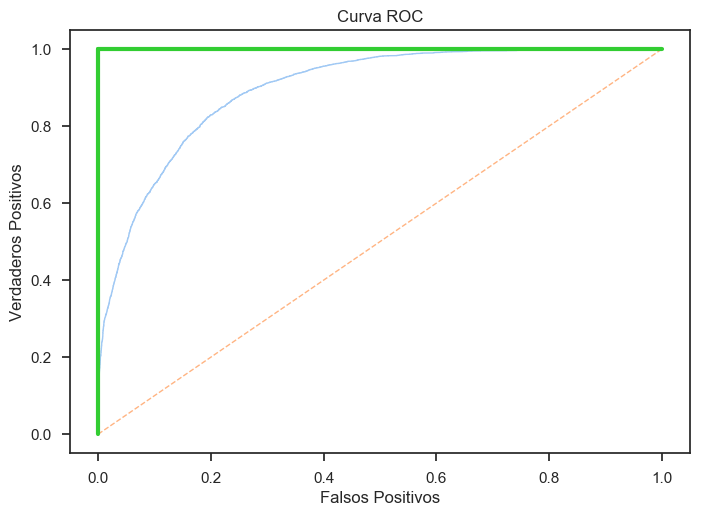

In [95]:
# Gráfica curva ROC
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [96]:
# COEFICIENTE DE DESEMPEÑO ROC DEL MODELO
roc_auc_score(y_test, yhat)

0.8975147138482714

In [103]:
# reestimacion de los valores predichos de para obtener la probabilidad entre 0 y 1.
yhat = model_trained_2.predict_proba(X_test)[:, 1]
# generacion de los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, yhat)

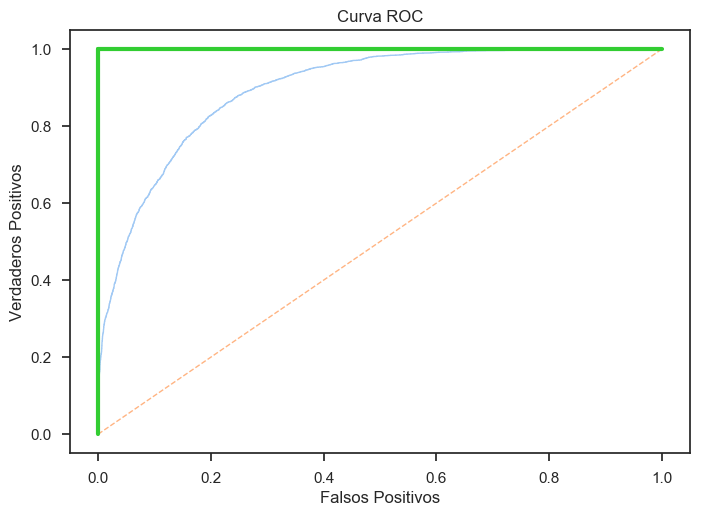

In [104]:
# Gráfica curva ROC
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [99]:
roc_auc_score(y_test, yhat)

0.8942229918609195

In [100]:
# reestimacion de los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
yhat = model_trained_3.predict_proba(X_test)[:, 1]
# generacion de los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, yhat)

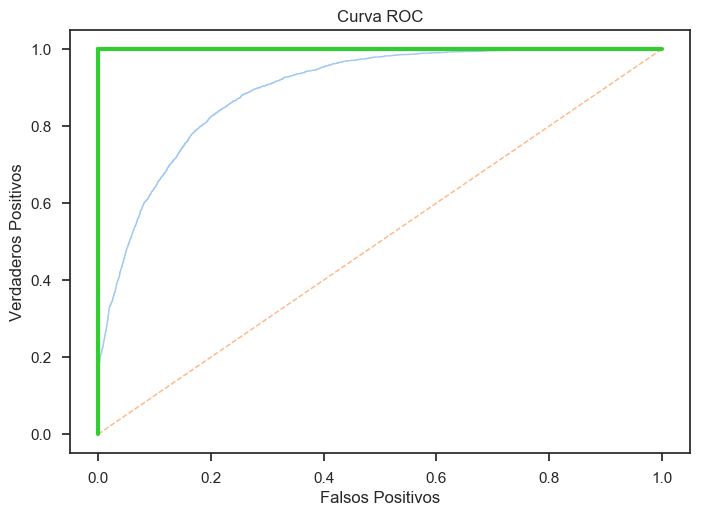

In [101]:
# Gráfica curva ROC
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [102]:
roc_auc_score(y_test, yhat)

0.8942229918609195

Los 3 modelos tienen coeficientes ROC cercanos a 0.9, lo que indica la curva que son buenos generando clasificaciones, ya que están muy por encima del valor de clasificación aleatorio (0.5), pero dado las métricas anteriores de precisión, recall, F1, en conjunto el primer modelo puede clasificar mejor ambos casos.

                                ***